<a href="https://colab.research.google.com/github/Prashikta/KMeans-Iris_visualization/blob/main/GRIP21_July_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GRIP (Graduate Rotational Internship Program)

## **K-Means Clustering task** : *Prediction using Unsupervised ML*

### **Problem Statement:**
From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually.

### Author: Prashikta Gupta

#### Import libraries

In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read the data

In [2]:
#Reading the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
data = pd.read_csv(url, names=names)

In [3]:
data.shape

(150, 5)

In [4]:
data.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Finding the optimum number of clusters

In [6]:
x = data.iloc[:,:4].values
y = data.iloc[:,4:5]

In [7]:
#Frequency Table
data["class"].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: class, dtype: int64

This tell us that there are 3 classes.

In [8]:
from sklearn.cluster import KMeans
sse = []

for cluster in range(1,11):
  kmean = KMeans(n_clusters=cluster, random_state=0)
  kmean.fit(x)
  sse.append(kmean.inertia_)

#### Plotting the results using elbow curve

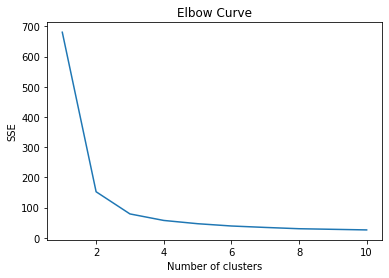

In [9]:
#elbow curve
plt.plot(range(1,11), sse)
plt.title("Elbow Curve")
plt.xlabel("Number of clusters")
plt.ylabel("SSE") #sum of squared distance
plt.show()

From the above graph, the optimum clusters is where the elbow occurs. This is when the sum of squared distance (SSE) doesn't decrease significantly with every iteration.
###### From this we conclude the optimum number of clusters as 3

In [10]:
# Applying kmeans to the dataset
kmean = KMeans(n_clusters=3, random_state=0)
pred = kmean.fit_predict(x)

#### Representing clusters visually

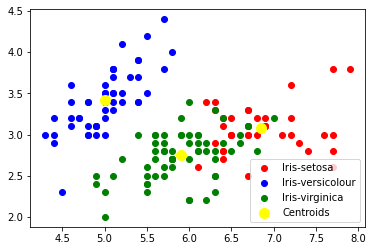

In [11]:
plt.scatter(x[pred == 0, 0], x[pred == 0, 1], c = 'red', label = 'Iris-setosa')
plt.scatter(x[pred == 1, 0], x[pred == 1, 1], c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[pred == 2, 0], x[pred == 2, 1], c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmean.cluster_centers_[:, 0], kmean.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()